In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, jaccard_score
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\ishit\Downloads\winequality.csv")
df.head(5)



,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.shape

(6497, 13)

In [6]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
df['fixed acidity'].fillna(0,inplace=True)
df['volatile acidity'].fillna(0,inplace=True)
df['citric acid'].fillna(0,inplace=True)
df['residual sugar'].fillna(0,inplace=True)
df['chlorides'].fillna(0,inplace=True)
df['pH'].fillna(0,inplace=True)
df['sulphates'].fillna(0,inplace=True)

In [9]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
X=df.drop('quality',axis=1)
X=X.values
newtype= preprocessing.LabelEncoder()
newtype.fit(['white','red'])
X[:,0]=newtype.transform(X[:,0])


In [19]:
X = np.asarray(X)
y = np.asarray(df['quality'])


In [32]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print('\nJaccard Score: ',jaccard_score(y_test, yhat,average='weighted'))
cls=[6, 5, 7, 8, 4, 3, 9]
cnf_matrix = confusion_matrix(y_test, yhat, labels=cls)
print('Confussion matrix: \n',cnf_matrix)
print ('classification report: ',classification_report(y_test, yhat))
print('Log loss',log_loss(y_test, yhat_prob))



Jaccard Score:  0.3388789371547993
Confussion matrix: 
 [[414 133   2   0   0   0   0]
 [156 274   0   0   0   0   0]
 [200  15  12   0   0   0   0]
 [ 38   3   2   0   0   0   0]
 [ 19  25   0   0   0   0   0]
 [  3   3   0   0   0   0   0]
 [  1   0   0   0   0   0   0]]
classification report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        44
           5       0.60      0.64      0.62       430
           6       0.50      0.75      0.60       549
           7       0.75      0.05      0.10       227
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.26      0.21      0.19      1300
weighted avg       0.54      0.54      0.48      1300

Log loss 1.2226273705444306


C:\Users\ishit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


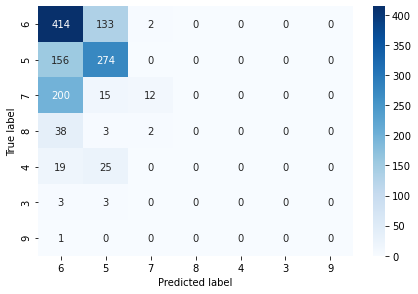

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cnf_matrix,cmap="Blues",annot=True,fmt="d",xticklabels=cls,yticklabels=cls)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
x_new=[[0,9.0, 0.38 ,0.15, 9,0.085,57,190, 1.002, 4.0,0.12,10.5]]
y_new=LR.predict(x_new)
print(y_new)

[5]
